# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Preprocessing

In [3]:
emailData = pd.read_csv('email.csv')

In [4]:
emailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
emailData.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
emailData.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
emailData = emailData.drop(emailData.index[-1])

# Adding another column that shows the length of messages
emailData['MessageLength'] = emailData['Message'].apply(len)

emailData.head()

,Category,Message,MessageLength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


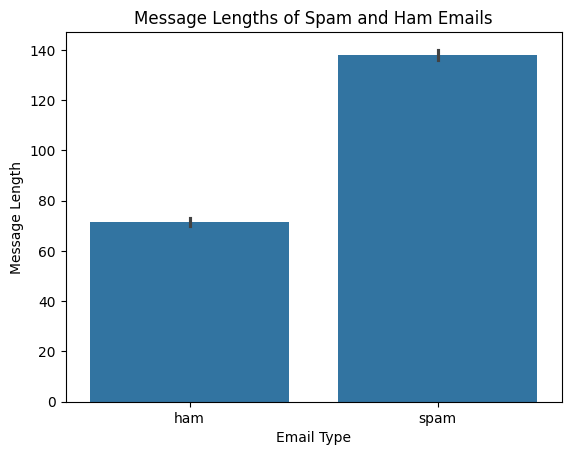

In [8]:
sns.barplot(x = 'Category', y = 'MessageLength', data = emailData)
plt.title('Message Lengths of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Message Length')
plt.show()

# Split Data into Training and Testing

In [9]:
emailData.loc[emailData['Category'] == 'ham', 'Category',] = 0
emailData.loc[emailData['Category'] == 'spam', 'Category',] = 1

# Placing the correct values in x and y variables
x = emailData["Message"]
y = emailData["Category"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Model Training

In [11]:
featureExtraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

x_train_features = featureExtraction.fit_transform(x_train)
x_test_features = featureExtraction.transform(x_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [12]:
LogisticReg = LogisticRegression()
LogisticReg.fit(x_train_features, y_train)

LogisticRegression()

In [13]:
trainingPred = LogisticReg.predict(x_train_features)
accuracy = accuracy_score(y_train, trainingPred)

print(accuracy)

0.9670181736594121


In [14]:
testingPred = LogisticReg.predict(x_test_features)

# Model Evaluation

In [15]:
accuracy = accuracy_score(y_test, testingPred)

print(accuracy)

0.967713004484305


In [17]:
import pickle

with open('model.pkl','wb') as file:
    pickle.dump((featureExtraction, LogisticReg), file)

print("Model saved successfully")

Model saved successfully
